# Infalling Analysis
This notebook was originated from the question about the relation of star formation history and satellite trajectory to gas loss. How does SFH around infall affect SN-driven gas loss for different mass size galaxies?
Since the rate of SN-heating is proportional to SFR, I analyzed the change in SFR for each timestep after infalling process and how that shows the unique behavior for each different sim data. Some part of this code was borrowed from Hollis' particle tracking notebook.

In [1]:
#importing everything
from analysis import * 
from compiler import *
from infallinganalysis import *

base.py executed
compiler.py executed


In [2]:
import pandas as pd
path = '../Justice_League_Code/Data/tracked_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = [k[1:] for k in hdf.keys()]
    print(len(keys), 'Available keys:', *keys)

28 Available keys: h148_10 h148_12 h148_249 h148_251 h148_27 h148_282 h148_3 h148_34 h148_38 h148_4 h148_55 h148_6 h148_65 h229_14 h229_18 h229_20 h229_22 h229_49 h242_10 h242_21 h242_30 h242_38 h242_401 h242_69 h242_8 h329_117 h329_29 h329_7


## Data Aquisition

In [14]:
#checking the satellite data, 'h148_10' for instance
key = 'h148_251'

sim, haloid = str(key[:4]), int(key[5:])
data = read_tracked_particles(sim, haloid)

> Returning <tracked_particle> dataset <


In [15]:
print(filenames[sim])
s = pynbody.load(filenames[sim])
h = s.halos()

halo = h.load_copy(haloid)

/home/watanabe/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200crit_h148/h148.cosmo50PLK.3072g3HbwK1BH.004096


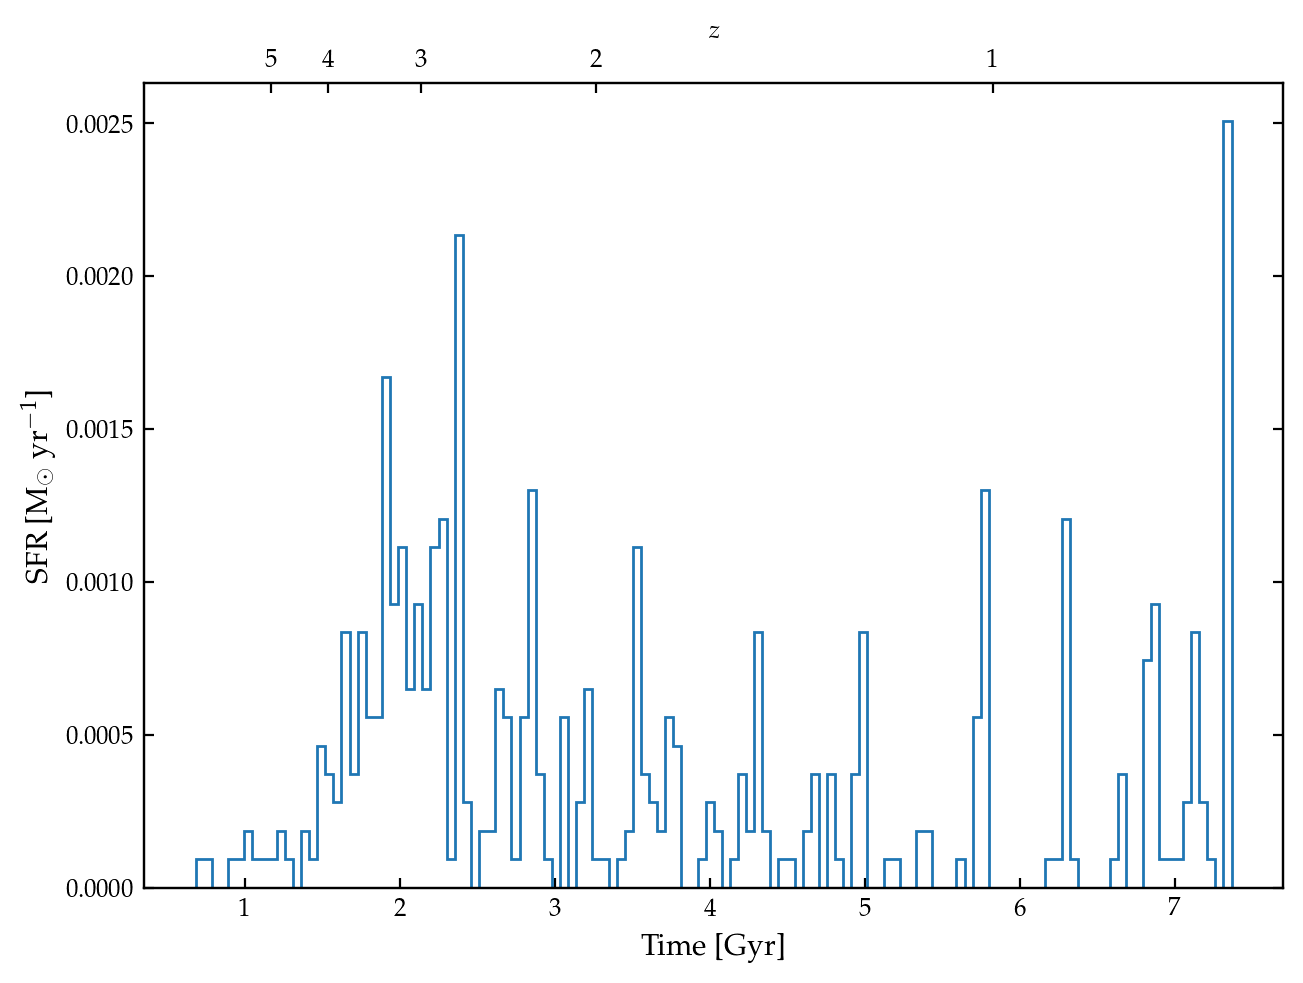

In [16]:
sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=128)

In [25]:
len(np.unique(data.time))

21

In [10]:
satdata = pd.read_csv('all-satellite-data-overtime.csv')
satdata.head()

,time,t,redshift,a,haloid,z0haloid,mstar,mgas,mass,Rvir,...,outflow_23,inflow_temp_23,outflow_temp_23,inflow_91,outflow_91,inflow_temp_91,outflow_temp_91,sim,key,Hdist
0,13.800797,13.800797,5.299428e-11,1.0,2,2,2.268773e+09,8.252345e+09,9.575866e+10,95.146148,...,0.456047,15363.511326,38446.496389,-0.000273,0.042408,24099.185653,23684.923082,h148,h148_2,504.170554
1,13.800797,13.800797,5.299428e-11,1.0,3,3,1.502171e+09,2.975036e+09,4.697010e+10,76.051992,...,0.152226,17219.020137,33047.679894,-0.000695,0.011663,17575.500434,23926.035774,h148,h148_3,291.305391
2,13.800797,13.800797,5.299428e-11,1.0,4,4,4.317847e+08,9.706413e+08,3.248971e+10,67.257466,...,0.063139,18398.471344,33268.395814,-0.000039,0.005368,62860.398438,18839.048065,h148,h148_4,173.039024
3,13.800797,13.800797,5.299428e-11,1.0,6,6,3.315968e+08,1.010160e+09,2.869601e+10,64.527622,...,0.104018,19798.461485,33827.872952,-0.000851,0.002218,20912.136058,26878.758550,h148,h148_6,329.096623
4,13.800797,13.800797,5.299428e-11,1.0,7,7,2.359537e+08,1.596514e+08,1.561130e+10,52.678621,...,0.013406,42228.990382,43249.799751,0.000000,0.000273,NaN,18808.567349,h148,h148_7,340.276764


## Plotting

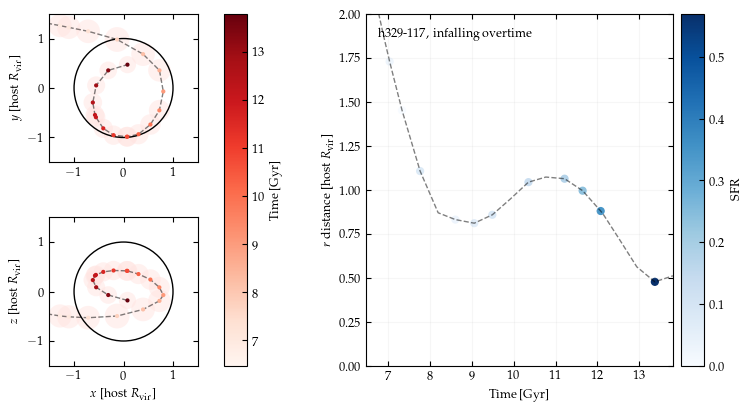

In [50]:
fig = plt.figure(dpi=100, figsize=(7.5,4))
gs = mpl.gridspec.GridSpec(2,6, width_ratios = [1.2,0.15,0.2,1,1,0.15], figure=fig)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,3:5])
cbax1 = plt.subplot(gs[:,1])
cbax2 = plt.subplot(gs[:,5])

R = 1.5 # in Rvir, the maximum radius to plot 

#calculate the relative distance from host in each time step
x_rels, y_rels, z_rels, r_rels, Rvirs, sfrs, ts = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
for t in np.unique(data.time):
        d = data[data.time==t]
        satd = satdata[satdata.time==t]
        sat_x, sat_y, sat_z = np.mean(d.sat_Xc), np.mean(d.sat_Yc), np.mean(d.sat_Zc)
        host_x, host_y, host_z = np.mean(d.host_Xc), np.mean(d.host_Yc), np.mean(d.host_Zc)

        h1Rvir = np.mean(d.hostRvir)
        satRvir = np.mean(d.satRvir)

        Rvirs = np.append(Rvirs, satRvir/h1Rvir)
        
        x_rel = (sat_x-host_x)/h1Rvir
        y_rel = (sat_y-host_y)/h1Rvir
        z_rel = (sat_z-host_z)/h1Rvir
        
        radii = plt.Circle((x_rel,y_rel),
                         satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
        ax0.add_artist(radii)

        radii = plt.Circle((x_rel,z_rel),
                         satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
        ax1.add_artist(radii)
        
        x_rels = np.append(x_rels, x_rel)
        y_rels = np.append(y_rels, y_rel)
        z_rels = np.append(z_rels, z_rel)
        r_rels = np.append(r_rels, np.sqrt(x_rel**2 + y_rel**2 + z_rel**2)) 
        
        sfrs = np.append(sfrs, np.mean(satd.sfr))
        
        ts = np.append(ts,t)
        
host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax0.add_artist(host_radius)

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax1.add_artist(host_radius)
        
ax0.plot(x_rels, y_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
ax1.plot(x_rels, z_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
ax0.scatter(x_rels, y_rels, c=ts, cmap='Reds', s=4, zorder=2)
ax1.scatter(x_rels, z_rels, c=ts, cmap='Reds', s=4, zorder=2)

ax2.scatter(ts, r_rels, c=sfrs, cmap='Blues', s=24)
ax2.plot(ts, r_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
ax2.grid(alpha = 0.1)

#print(ts, r_rels)

tmin, tmax = np.min(data.time), np.max(data.time)
sfrmin, sfrmax = np.min(satdata.sfr), np.max(satdata.sfr)
    
cb1 = mpl.colorbar.ColorbarBase(cbax1, cmap=mpl.cm.Reds, orientation='vertical', 
                                    norm = mpl.colors.Normalize(vmin=tmin, vmax=tmax),
                                    label='Time [Gyr]')
cb2 = mpl.colorbar.ColorbarBase(cbax2, cmap=mpl.cm.Blues, orientation='vertical', 
                                    norm = mpl.colors.Normalize(vmin=sfrmin, vmax=sfrmax),
                                    label='SFR')

ax1.set_xlabel(r'$x$ [host $R_{\rm vir}$]')
ax1.set_ylabel(r'$z$ [host $R_{\rm vir}$]')
ax0.set_ylabel(r'$y$ [host $R_{\rm vir}$]')
ax2.annotate(f"{key.replace('_','-')}, infalling overtime", (0.04, 0.96), xycoords='axes fraction', va='top')

ax0.set_xlim(-R,R)
ax0.set_ylim(-R,R)
ax1.set_xlim(-R,R)
ax1.set_ylim(-R,R)
ax2.set_xlim(tmin, tmax)
ax2.set_ylim(0, 2) # in Rvir

ax0.set_aspect('equal')
ax1.set_aspect('equal')

ax2.set_xlabel(r'Time [Gyr]')
ax2.set_ylabel(r'$r$ distance [host $R_{\rm vir}$]')

ax0.tick_params(top=True,right=True,direction='in', which='both')
ax1.tick_params(top=True,right=True,direction='in', which='both')
ax2.tick_params(top=True,right=True,direction='in', which='both')

plt.savefig(f'plots/{key}_infalling.pdf')

plt.show()

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_10 <


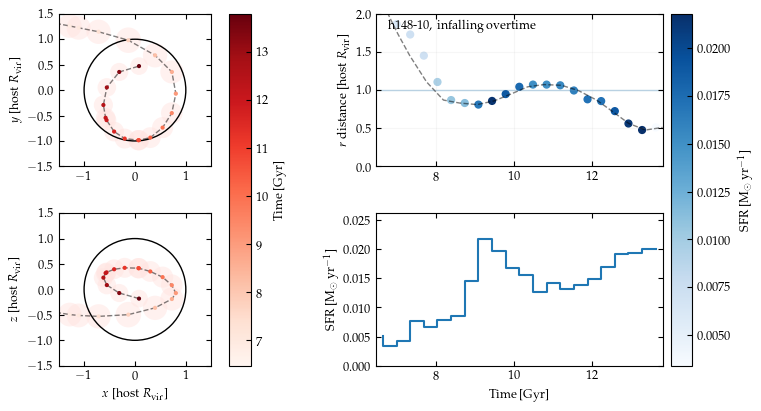

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_12 <


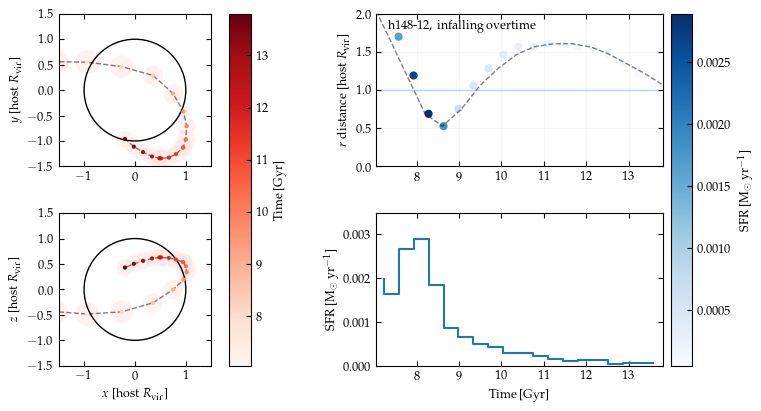

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_249 <


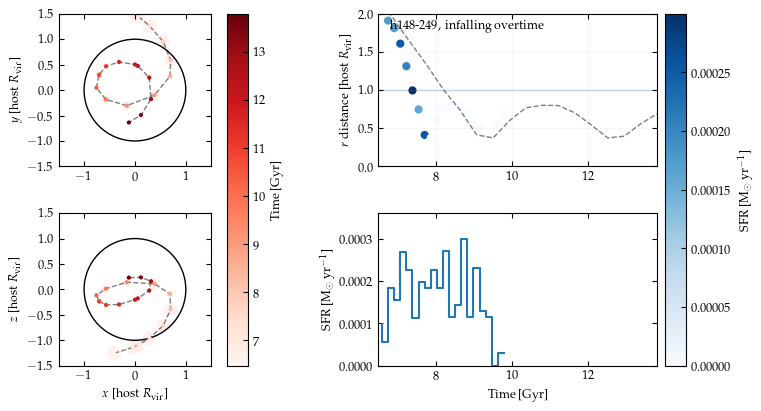

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_251 <


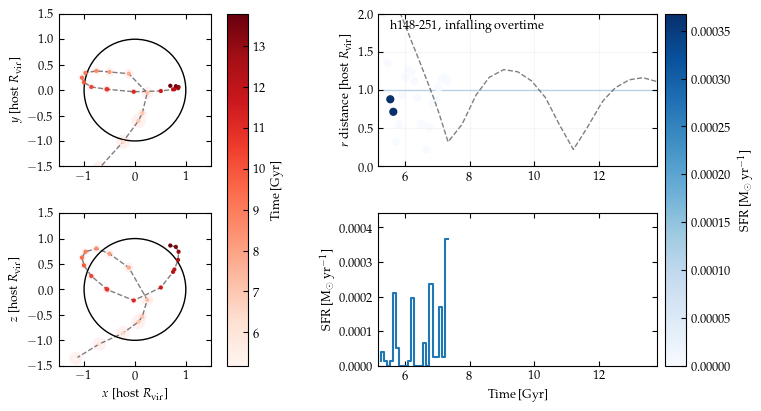

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_27 <


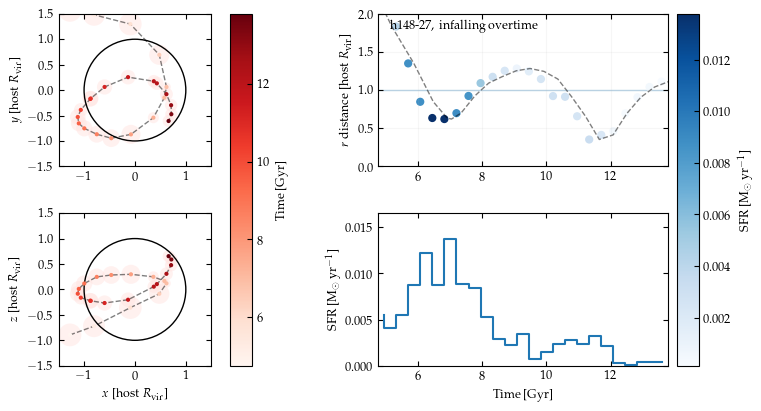

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_282 <


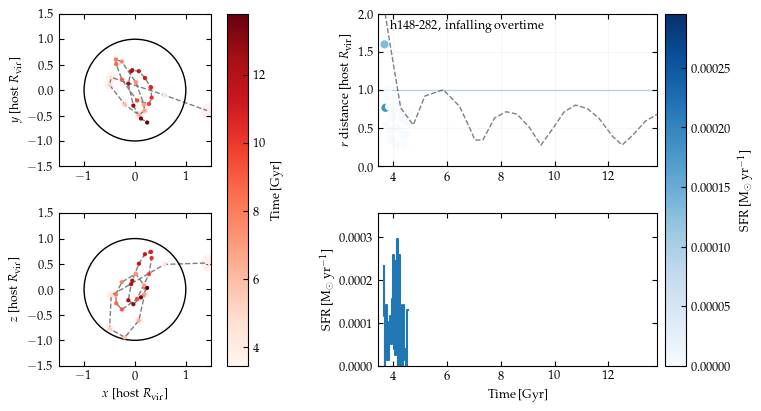

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_3 <


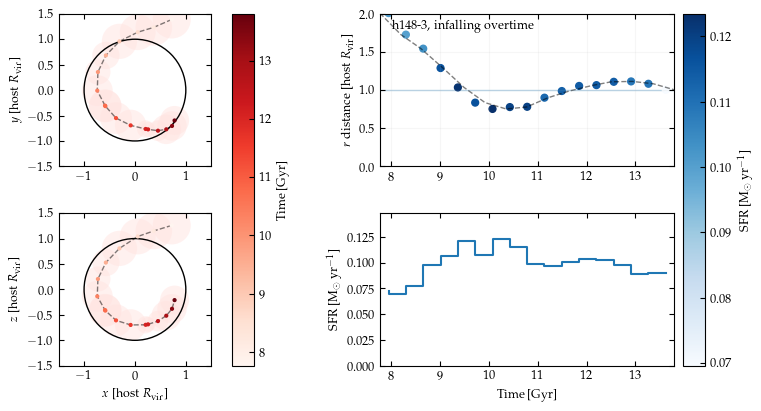

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_34 <


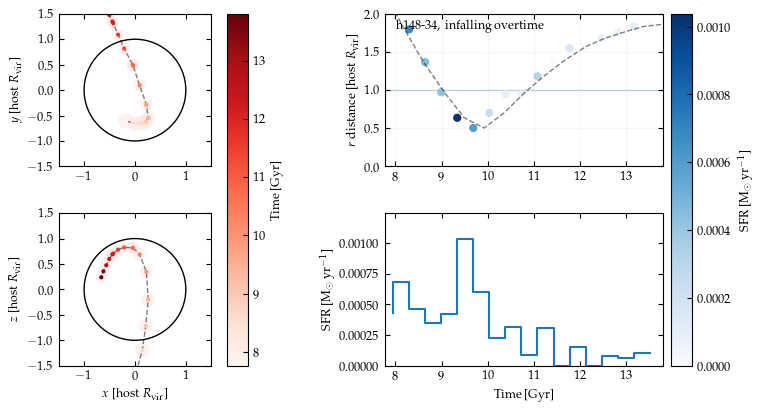

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_38 <


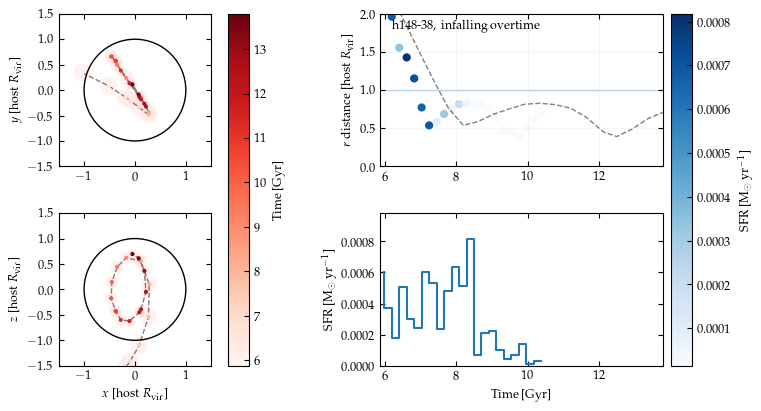

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_4 <


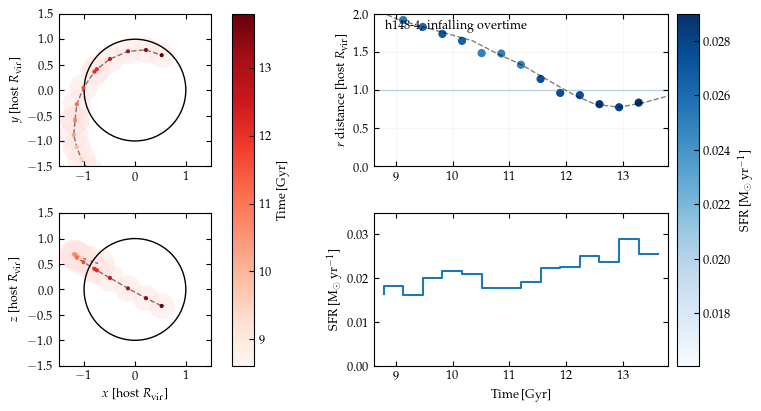

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_55 <


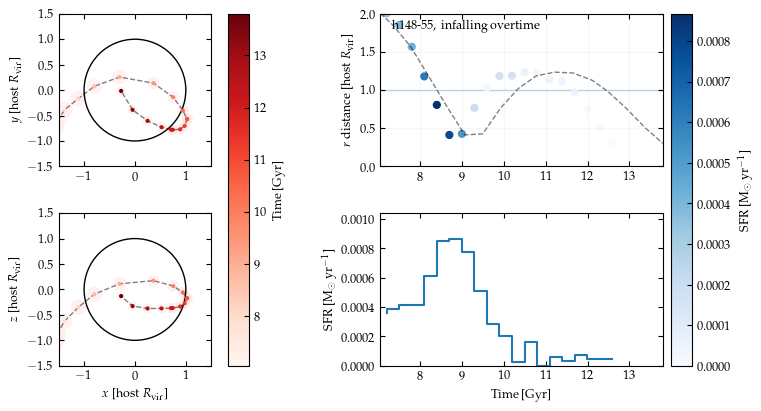

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_6 <


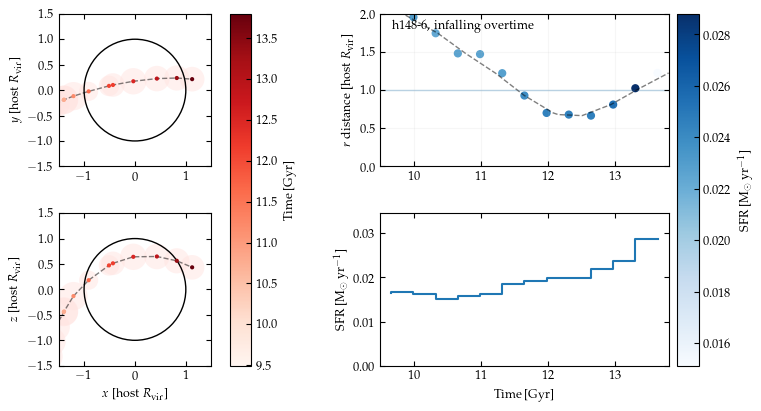

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h148_65 <


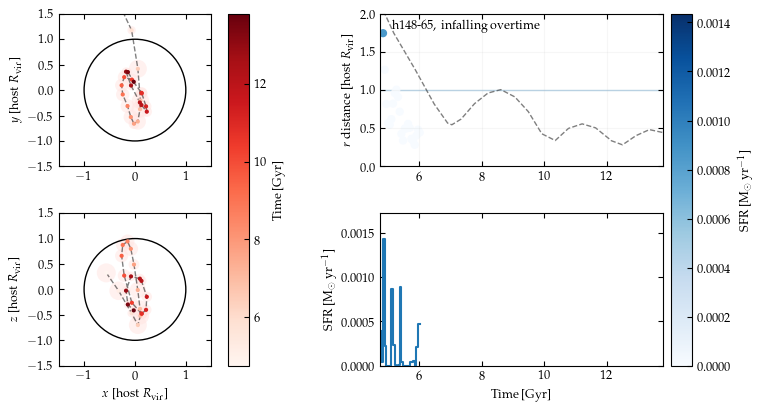

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h229_14 <


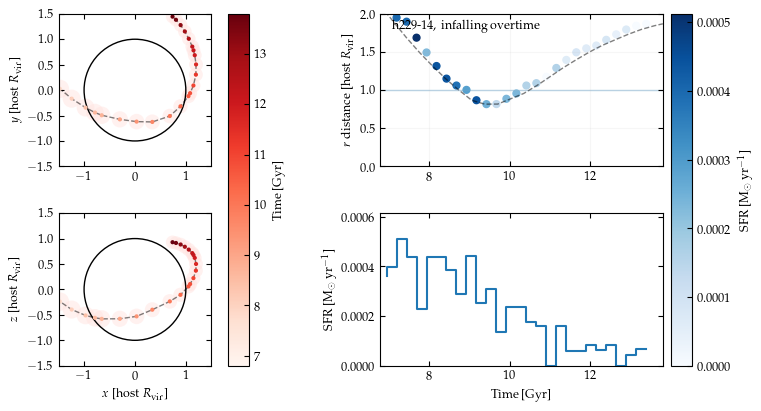

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h229_18 <


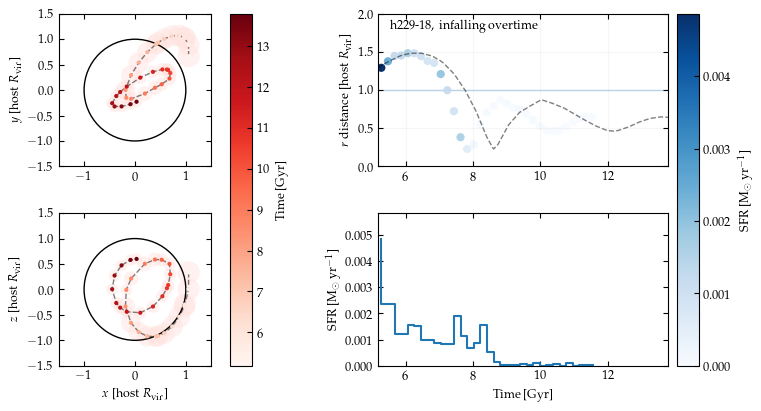

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h229_20 <


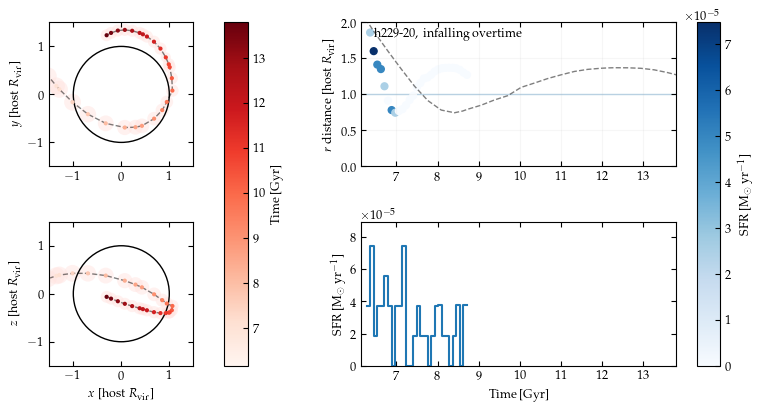

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h229_22 <


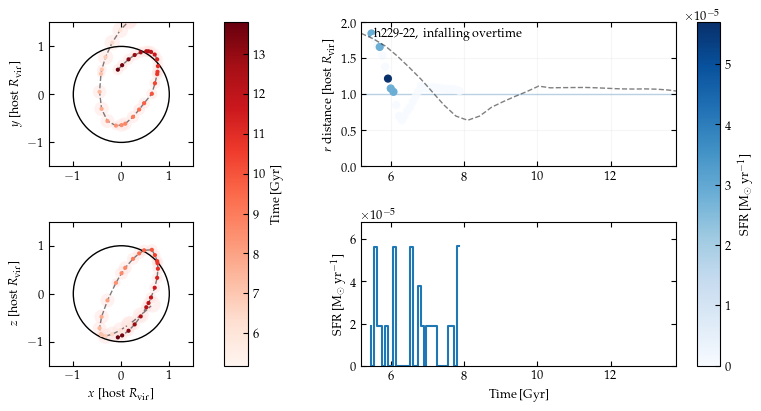

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h229_49 <


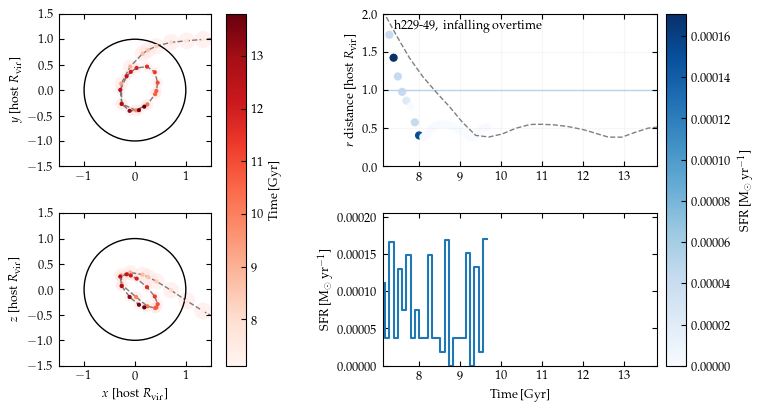

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_10 <


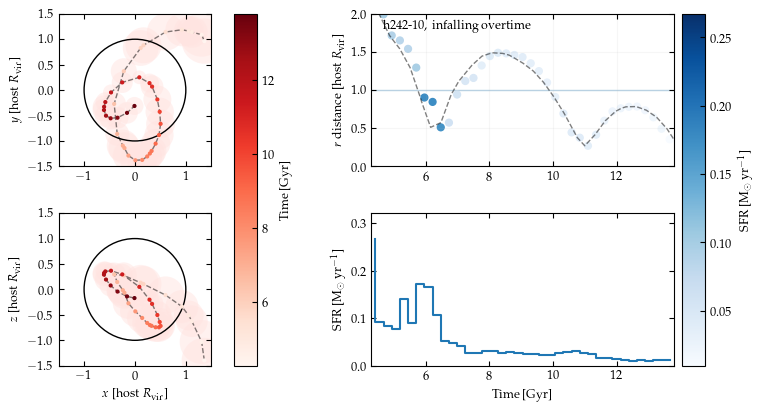

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_21 <


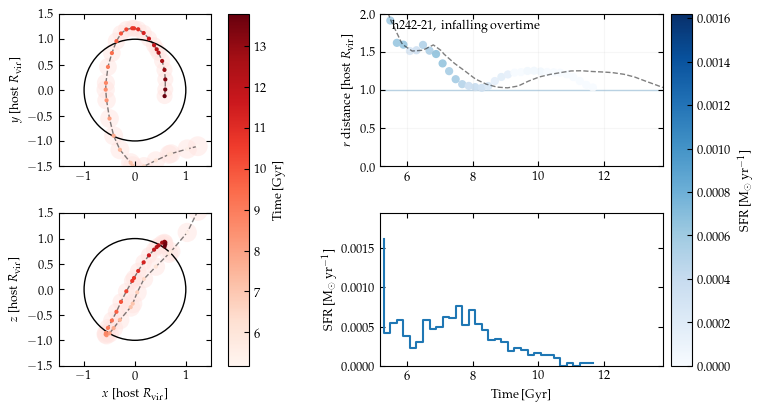

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_30 <


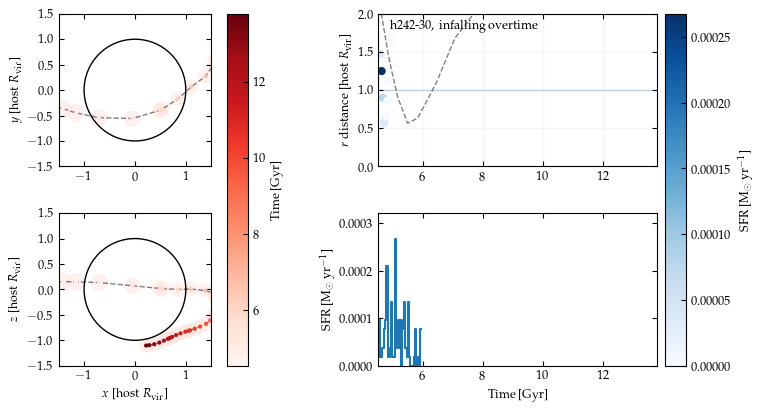

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_38 <


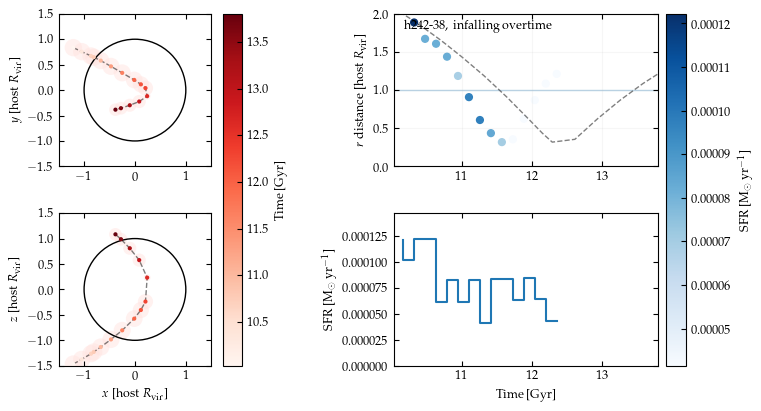

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_401 <


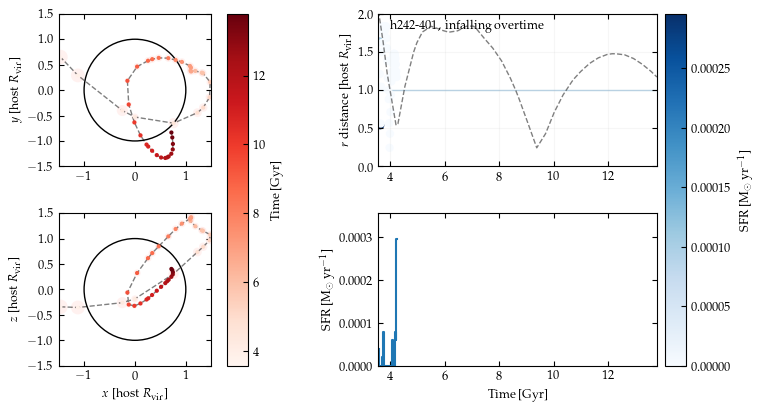

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_69 <


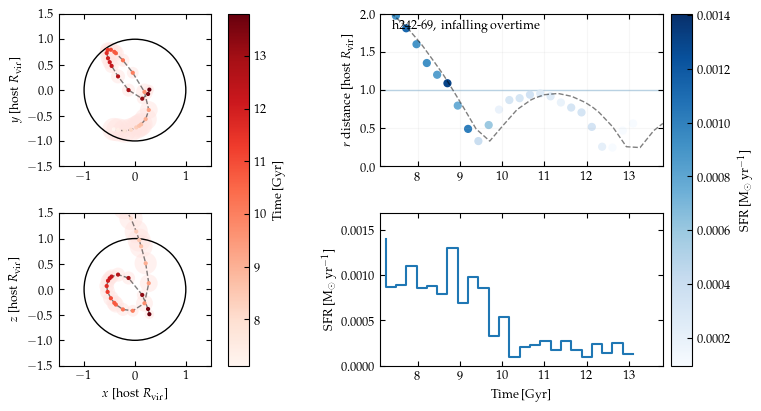

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h242_8 <


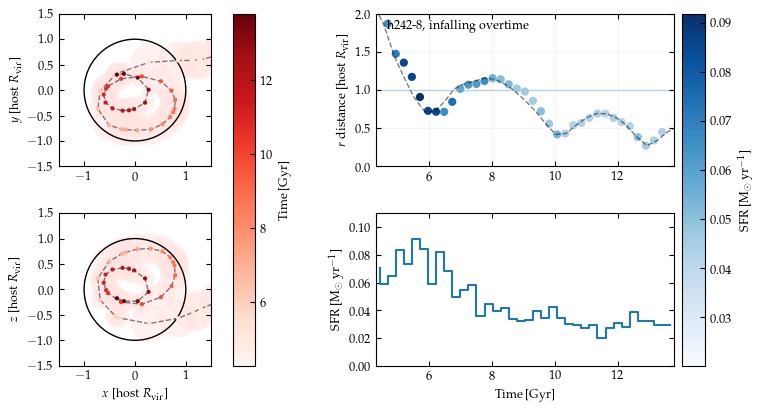

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h329_117 <


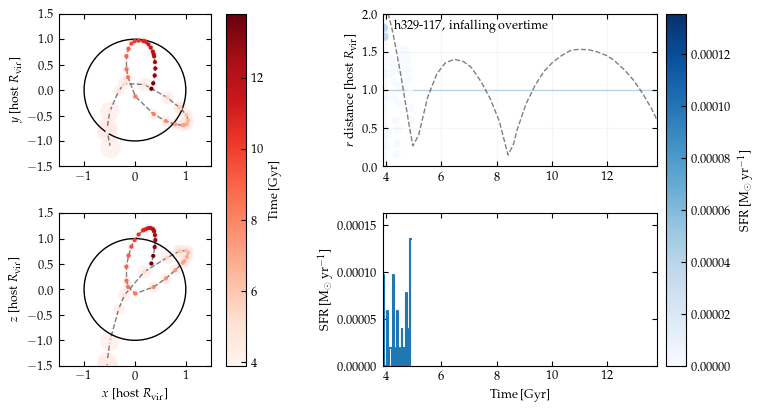

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h329_29 <


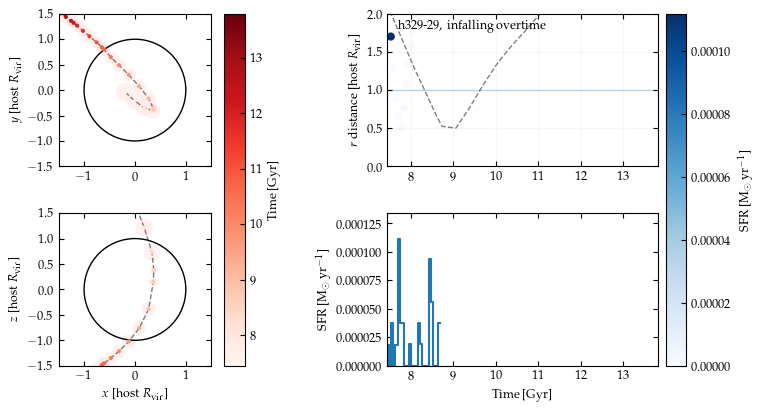

> Returning <tracked_particle> dataset <
> Returning <tracked_particle> dataset <
> Returning (sfr) variable for h329_7 <


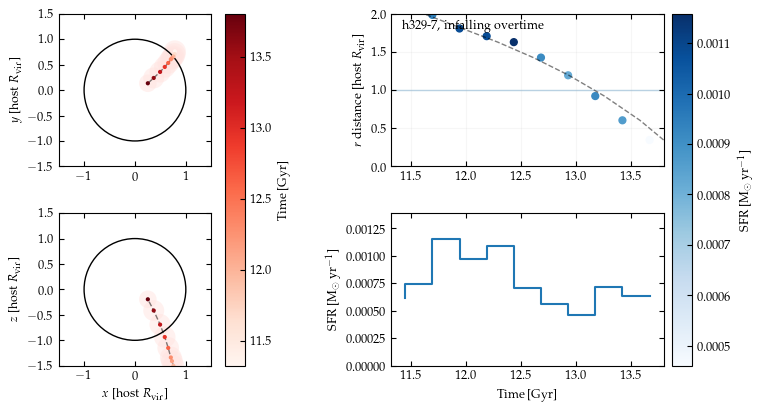

In [13]:
#replication for all the satellites
from math import isclose #used for plotting SFR over time graph

R = 1.5 # in Rvir, the maximum radius to plot 
exclude = []
#exclude = ['h148_10']

for key in keys:
    
    # skipping the one I already have
    if key in exclude:
        continue

    # read the sim tracked particles data
    sim, haloid = str(key[:4]), int(key[5:])
    data1 = read_tracked_particles(sim, haloid)
    sfr1, bins = calc_sfr(key)
    bincenters = 0.5*(bins[1:] + bins[:-1])
    
    tmin, tmax = np.min(data1.time), np.max(data1.time)
    sfrmin, sfrmax = np.min(sfr1), np.max(sfr1)
    #print(bins, bincenters, np.unique(data1.time))

    fig = plt.figure(dpi=100, figsize=(7.5,4))
    gs = mpl.gridspec.GridSpec(2,6, width_ratios = [1.2,0.15,0.2,1,1,0.15], figure=fig)
    ax0 = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[1,0])
    ax2 = plt.subplot(gs[0,3:5])
    ax3 = plt.subplot(gs[1,3:5])
    cbax1 = plt.subplot(gs[:,1])
    cbax2 = plt.subplot(gs[:,5])
    
    #calculate the relative distance from host in each time step
    x_rels, y_rels, z_rels, r_rels, Rvirs, sfrs, ts = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
    for i, t in enumerate(np.unique(data1.time)):
            d = data1[data1.time==t] # find the satellite data at time t
            
            sat_x, sat_y, sat_z = np.mean(d.sat_Xc), np.mean(d.sat_Yc), np.mean(d.sat_Zc)
            host_x, host_y, host_z = np.mean(d.host_Xc), np.mean(d.host_Yc), np.mean(d.host_Zc)

            h1Rvir = np.mean(d.hostRvir)
            satRvir = np.mean(d.satRvir)

            Rvirs = np.append(Rvirs, satRvir/h1Rvir)

            x_rel = (sat_x-host_x)/h1Rvir
            y_rel = (sat_y-host_y)/h1Rvir
            z_rel = (sat_z-host_z)/h1Rvir

            radii = plt.Circle((x_rel,y_rel),
                             satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
            ax0.add_artist(radii)

            radii = plt.Circle((x_rel,z_rel),
                             satRvir/h1Rvir, ec='none',fc='mistyrose', alpha=0.5, fill=True, zorder=0.5)
            ax1.add_artist(radii)

            x_rels = np.append(x_rels, x_rel)
            y_rels = np.append(y_rels, y_rel)
            z_rels = np.append(z_rels, z_rel)
            r_rels = np.append(r_rels, np.sqrt(x_rel**2 + y_rel**2 + z_rel**2)) 

            #find sfr at time t
            if isclose(bincenters[i], t, abs_tol=1e-2):
                sfr = sfr1[i]
            else:
                try:
                    sfr = sfr1[np.where(bincenters > t)[0][0]] #pick the first bincenters that is close to t
                except:
                    sfr = 0 #no close bincenters, skip this
            sfrs = np.append(sfrs, sfr)

            ts = np.append(ts,t)

    host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
    ax0.add_artist(host_radius)

    host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
    ax1.add_artist(host_radius)

    #plot x, y trajectory
    ax0.plot(x_rels, y_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
    #plot x, z trajectory
    ax1.plot(x_rels, z_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
    ax0.scatter(x_rels, y_rels, c=ts, cmap='Reds', s=4, zorder=2)
    ax1.scatter(x_rels, z_rels, c=ts, cmap='Reds', s=4, zorder=2)

    #plot distance vs time w/ SFR
    ax2.scatter(bincenters, r_rels, c=sfrs, cmap='Blues', s=24)
    ax2.plot(ts, r_rels, 'k--', linewidth=1, alpha = 0.5, zorder=1)
    ax2.axhline(y=1.0, linewidth=1, alpha = 0.3, zorder=0)
    ax2.grid(alpha = 0.1)
    # make a hitogram of sfh
    ax3.step(bincenters, sfr1)
    
    ##print(ts, r_rels)
    ##print(sfrs)

    cb1 = mpl.colorbar.ColorbarBase(cbax1, cmap=mpl.cm.Reds, orientation='vertical', 
                                        norm = mpl.colors.Normalize(vmin=tmin, vmax=tmax),
                                        label='Time [Gyr]')
    cb2 = mpl.colorbar.ColorbarBase(cbax2, cmap=mpl.cm.Blues, orientation='vertical', 
                                        norm = mpl.colors.Normalize(vmin=sfrmin, vmax=sfrmax),
                                        label='SFR [M$_\odot$ yr$^{-1}$]')

    ax1.set_xlabel(r'$x$ [host $R_{\rm vir}$]')
    ax1.set_ylabel(r'$z$ [host $R_{\rm vir}$]')
    ax0.set_ylabel(r'$y$ [host $R_{\rm vir}$]')
    ax2.annotate(f"{key.replace('_','-')}, infalling overtime", (0.04, 0.96), xycoords='axes fraction', va='top')
    ax3.set_xlabel('Time [Gyr]')
    ax3.set_ylabel('SFR [M$_\odot$ yr$^{-1}$]')

    ax0.set_xlim(-R,R)
    ax0.set_ylim(-R,R)
    ax1.set_xlim(-R,R)
    ax1.set_ylim(-R,R)
    ax2.set_xlim(tmin, tmax)
    ax2.set_ylim(0, 2) # in Rvir
    ax3.set_xlim(tmin, tmax)
    ax3.set_ylim(0.0, 1.2 * np.max(sfr1))

    ax0.set_aspect('equal')
    ax1.set_aspect('equal')

    ax2.set_ylabel(r'$r$ distance [host $R_{\rm vir}$]')

    ax0.tick_params(top=True,right=True,direction='in', which='both')
    ax1.tick_params(top=True,right=True,direction='in', which='both')
    ax2.tick_params(top=True,right=True,direction='in', which='both')
    ax3.tick_params(top=True,right=True,direction='in', which='both')

    plt.savefig(f'plots/{key}_infalling.pdf')

    plt.show()

In [8]:
testarray = np.array([4, 7, 0, 1])
output = np.where(testarray==7)[0][0]
print(output)

1
